In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import copy
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 9)

In [3]:
beta = 3
alpha = 1
learning_rate = 1
epslon = 0.0001

In [4]:
df = pd.read_csv('../datasets/TalaraBasin/dataset.csv', index_col=0)
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
km = AgglomerativeClustering(n_clusters=12)

In [6]:
silhouette = silhouette_score(X, km.fit_predict(X))
target_silhouette = silhouette * beta
print(f'Initial_silhouette = {silhouette}')
print(f'beta = {beta}')
print(f'Target_silhouette * beta = {target_silhouette}')

Initial_silhouette = 0.1624551451515513
beta = 3
Target_silhouette * beta = 0.4873654354546539


In [7]:
internal_df = copy.deepcopy(df)
alphas = [alpha]
silhouettes = [silhouette]

count_loop = 0
while silhouette < target_silhouette:
    count_loop += 1
    alpha += learning_rate
    internal_df['Main/single size mode(mm):'] = df['Main/single size mode(mm):']*alpha
    X = internal_df.iloc[:,:-1].values
    y = km.fit_predict(X)
    silhouette = silhouette_score(X, y)
    alphas += [alpha]
    silhouettes += [silhouette]
    print(f'Alpha = {alpha}')
    print(f'Silhouette = {silhouette}')
    
    if count_loop > 10000:
        print('Breaking!')
        break

Alpha = 2
Silhouette = 0.16247396338010736
Alpha = 3
Silhouette = 0.16250504111080388
Alpha = 4
Silhouette = 0.16254795773118424
Alpha = 5
Silhouette = 0.16372994312688924
Alpha = 6
Silhouette = 0.1638611083620896
Alpha = 7
Silhouette = 0.16401342646301187
Alpha = 8
Silhouette = 0.1630895690268621
Alpha = 9
Silhouette = 0.16346367872479292
Alpha = 10
Silhouette = 0.16286951220493126
Alpha = 11
Silhouette = 0.16366552060238748
Alpha = 12
Silhouette = 0.1645218538610217
Alpha = 13
Silhouette = 0.16541978939045004
Alpha = 14
Silhouette = 0.1663140796171521
Alpha = 15
Silhouette = 0.1809705861985594
Alpha = 16
Silhouette = 0.20689073173343256
Alpha = 17
Silhouette = 0.20804414194708187
Alpha = 18
Silhouette = 0.20923378417765384
Alpha = 19
Silhouette = 0.20912413114898742
Alpha = 20
Silhouette = 0.21023452955641503
Alpha = 21
Silhouette = 0.21136988565558043
Alpha = 22
Silhouette = 0.21252641312344672
Alpha = 23
Silhouette = 0.21370109300882473
Alpha = 24
Silhouette = 0.2148911452085352
Al

Alpha = 189
Silhouette = 0.2105059440555357
Alpha = 190
Silhouette = 0.21140652188795891
Alpha = 191
Silhouette = 0.212304176986235
Alpha = 192
Silhouette = 0.2131989026865838
Alpha = 193
Silhouette = 0.21845482064013397
Alpha = 194
Silhouette = 0.21887871105887036
Alpha = 195
Silhouette = 0.2193005788771076
Alpha = 196
Silhouette = 0.21972042762567182
Alpha = 197
Silhouette = 0.21882657047144058
Alpha = 198
Silhouette = 0.21924818650286684
Alpha = 199
Silhouette = 0.21966029364660503
Alpha = 200
Silhouette = 0.2200637781162636
Alpha = 201
Silhouette = 0.22046539701772142
Alpha = 202
Silhouette = 0.22086515420669778
Alpha = 203
Silhouette = 0.22126305365418927
Alpha = 204
Silhouette = 0.2216246180770016
Alpha = 205
Silhouette = 0.22195524786994109
Alpha = 206
Silhouette = 0.2222843128290031
Alpha = 207
Silhouette = 0.22440200961801682
Alpha = 208
Silhouette = 0.22476208130641293
Alpha = 209
Silhouette = 0.2250910414933413
Alpha = 210
Silhouette = 0.2254182714713998
Alpha = 211
Silhouet

Alpha = 376
Silhouette = 0.28181227106987766
Alpha = 377
Silhouette = 0.28234095135380144
Alpha = 378
Silhouette = 0.2828683435759206
Alpha = 379
Silhouette = 0.2833944497207361
Alpha = 380
Silhouette = 0.2839187017465638
Alpha = 381
Silhouette = 0.28444102668533705
Alpha = 382
Silhouette = 0.28496208032422454
Alpha = 383
Silhouette = 0.28548186467450015
Alpha = 384
Silhouette = 0.28600038176722026
Alpha = 385
Silhouette = 0.28651763365280103
Alpha = 386
Silhouette = 0.2870336224006164
Alpha = 387
Silhouette = 0.28754835009858276
Alpha = 388
Silhouette = 0.28806181885276794
Alpha = 389
Silhouette = 0.2885740307869949
Alpha = 390
Silhouette = 0.2890849880424484
Alpha = 391
Silhouette = 0.28959469277730243
Alpha = 392
Silhouette = 0.2901031471663358
Alpha = 393
Silhouette = 0.2906103534005632
Alpha = 394
Silhouette = 0.29111631368686663
Alpha = 395
Silhouette = 0.29162103024764063
Alpha = 396
Silhouette = 0.29212450532042905
Alpha = 397
Silhouette = 0.2926267411575783
Alpha = 398
Silhoue

Alpha = 561
Silhouette = 0.369981831021987
Alpha = 562
Silhouette = 0.3704010070762875
Alpha = 563
Silhouette = 0.3708193096292526
Alpha = 564
Silhouette = 0.3712367406006088
Alpha = 565
Silhouette = 0.37165200921274605
Alpha = 566
Silhouette = 0.3720570321086841
Alpha = 567
Silhouette = 0.3724612089995112
Alpha = 568
Silhouette = 0.37285564190056536
Alpha = 569
Silhouette = 0.37324578250768325
Alpha = 570
Silhouette = 0.3736351079026652
Alpha = 571
Silhouette = 0.3740236198338194
Alpha = 572
Silhouette = 0.3744113200482855
Alpha = 573
Silhouette = 0.3747893837040235
Alpha = 574
Silhouette = 0.37516546404533596
Alpha = 575
Silhouette = 0.37554075128632175
Alpha = 576
Silhouette = 0.3759152471356848
Alpha = 577
Silhouette = 0.376288953300814
Alpha = 578
Silhouette = 0.37666187148775876
Alpha = 579
Silhouette = 0.3770340034011892
Alpha = 580
Silhouette = 0.3774053507443697
Alpha = 581
Silhouette = 0.3777759152191275
Alpha = 582
Silhouette = 0.3781456985258208
Alpha = 583
Silhouette = 0.3

Alpha = 749
Silhouette = 0.4349176317030729
Alpha = 750
Silhouette = 0.4351532605232608
Alpha = 751
Silhouette = 0.4353883607433116
Alpha = 752
Silhouette = 0.4356229336567995
Alpha = 753
Silhouette = 0.43585698055419425
Alpha = 754
Silhouette = 0.4360905027228758
Alpha = 755
Silhouette = 0.43632350144713117
Alpha = 756
Silhouette = 0.4365559780081654
Alpha = 757
Silhouette = 0.4367879336840951
Alpha = 758
Silhouette = 0.43701936974995975
Alpha = 759
Silhouette = 0.4372502874777216
Alpha = 760
Silhouette = 0.4374806881362667
Alpha = 761
Silhouette = 0.4377105729914166
Alpha = 762
Silhouette = 0.43793994330592073
Alpha = 763
Silhouette = 0.43816880033946953
Alpha = 764
Silhouette = 0.43839714534869717
Alpha = 765
Silhouette = 0.4386249795871756
Alpha = 766
Silhouette = 0.438852304305431
Alpha = 767
Silhouette = 0.4390791207509411
Alpha = 768
Silhouette = 0.4393054301681374
Alpha = 769
Silhouette = 0.43953123379841397
Alpha = 770
Silhouette = 0.43975653288013117
Alpha = 771
Silhouette = 

Alpha = 938
Silhouette = 0.47105075345203934
Alpha = 939
Silhouette = 0.47120076240753783
Alpha = 940
Silhouette = 0.47135045578732404
Alpha = 941
Silhouette = 0.47149983431838555
Alpha = 942
Silhouette = 0.47164889872589694
Alpha = 943
Silhouette = 0.471797649733227
Alpha = 944
Silhouette = 0.4719460880619408
Alpha = 945
Silhouette = 0.47209421443180477
Alpha = 946
Silhouette = 0.47224202956078193
Alpha = 947
Silhouette = 0.47238953416505375
Alpha = 948
Silhouette = 0.47253672895900684
Alpha = 949
Silhouette = 0.4726836146552451
Alpha = 950
Silhouette = 0.47283019196459775
Alpha = 951
Silhouette = 0.47297646159611556
Alpha = 952
Silhouette = 0.47312242425707185
Alpha = 953
Silhouette = 0.47326808065298365
Alpha = 954
Silhouette = 0.47341343148759424
Alpha = 955
Silhouette = 0.47355847746289575
Alpha = 956
Silhouette = 0.4737032192791217
Alpha = 957
Silhouette = 0.47384765763475534
Alpha = 958
Silhouette = 0.4739909120549096
Alpha = 959
Silhouette = 0.4741329366904011
Alpha = 960
Silho

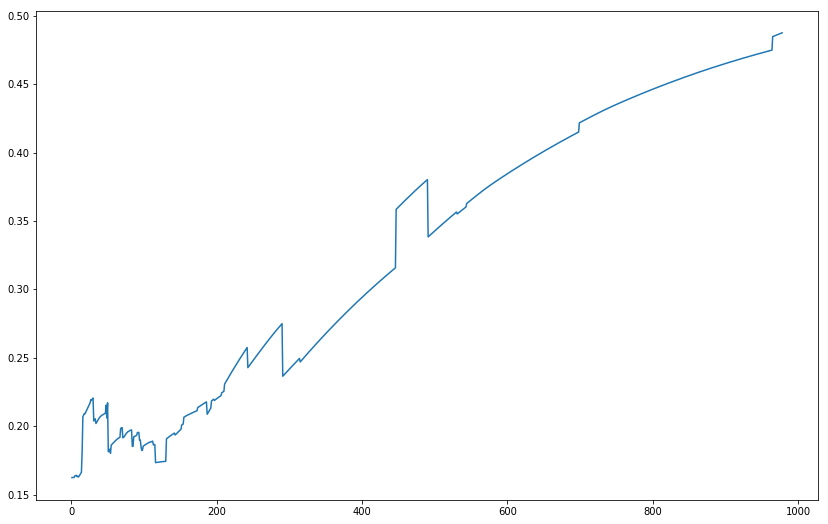

In [8]:
plt.plot(alphas, silhouettes)

In [9]:
df['Main/single size mode(mm):'] = df['Main/single size mode(mm):']*alpha

In [10]:
df.to_csv('test.csv')